In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

### График, требуемый в ТЗ

Считываем файл и строим график вероятности ошибки от дисперсии шума

In [3]:
data = pd.read_csv('bit_errors.txt', header=0, sep=',', index_col=False)

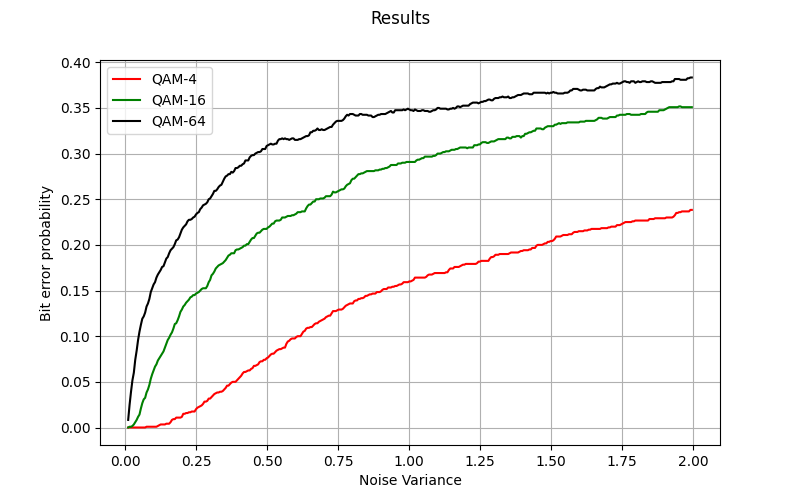

In [4]:
fig1 = plt.figure(figsize=(8,5))

ax_1 = fig1.add_subplot(111)
ax_1.plot(data['var'], data['qam4'],'r', label='QAM-4')
ax_1.plot(data['var'], data['qam16'],'g', label='QAM-16')
ax_1.plot(data['var'], data['qam64'],'k', label='QAM-64')

ax_1.set_xlabel("Noise Variance")
ax_1.set_ylabel("Bit error probability")
ax_1.legend()
ax_1.grid()


fig1.suptitle('Results')
plt.show()

### Прочие графики

Можно посмотреть как выглядит сигнал с добавлением шума на созвездии.

In [5]:
data2 = pd.read_csv('signal_on_constellation.txt', header=0, sep=',', index_col=False)

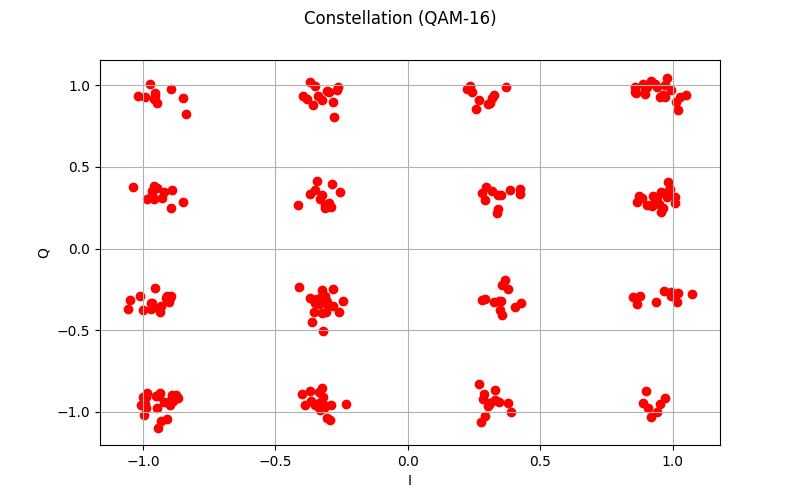

In [6]:
fig2 = plt.figure(figsize=(8,5))

ax_1 = fig2.add_subplot(111)
ax_1.scatter(data2['I'], data2['Q'], color='r')

ax_1.set_xlabel("I")
ax_1.set_ylabel("Q")
ax_1.grid()

fig2.suptitle('Constellation (QAM-16)')
plt.show()

Посмотреть классический график - вероятность битовой ошибки от ОСШ (мощность сигнала равна 1, а мощность шума равна дисперсии)

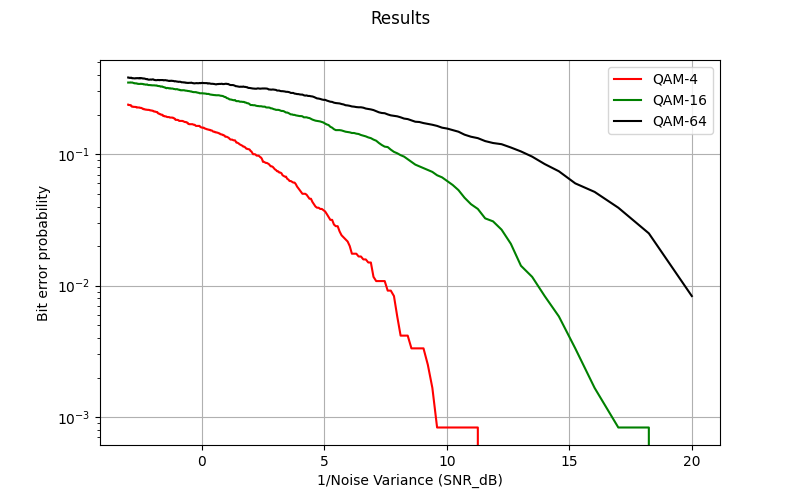

In [7]:
fig3 = plt.figure(figsize=(8,5))

ax_1 = fig3.add_subplot(111)
ax_1.plot(10*np.log10(1/data['var']), data['qam4'],'r', label='QAM-4')
ax_1.plot(10*np.log10(1/data['var']), data['qam16'],'g', label='QAM-16')
ax_1.plot(10*np.log10(1/data['var']), data['qam64'],'k', label='QAM-64')

ax_1.set_xlabel("1/Noise Variance (SNR_dB)")
ax_1.set_ylabel("Bit error probability")
ax_1.set_yscale('log')
ax_1.legend()
ax_1.grid()


fig3.suptitle('Results')
plt.show()

Использованные созвездия модуляторов

c:\Users\isvoropaev\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


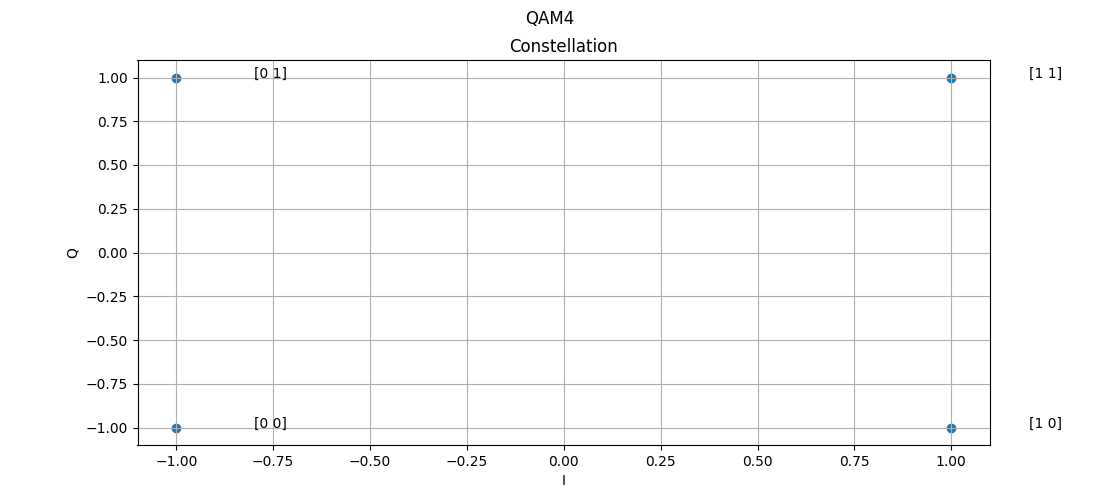

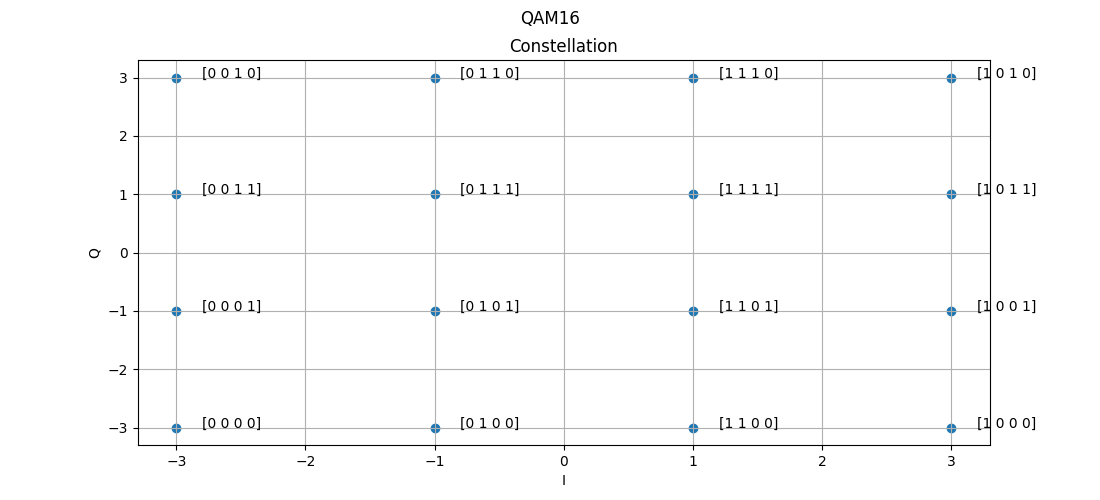

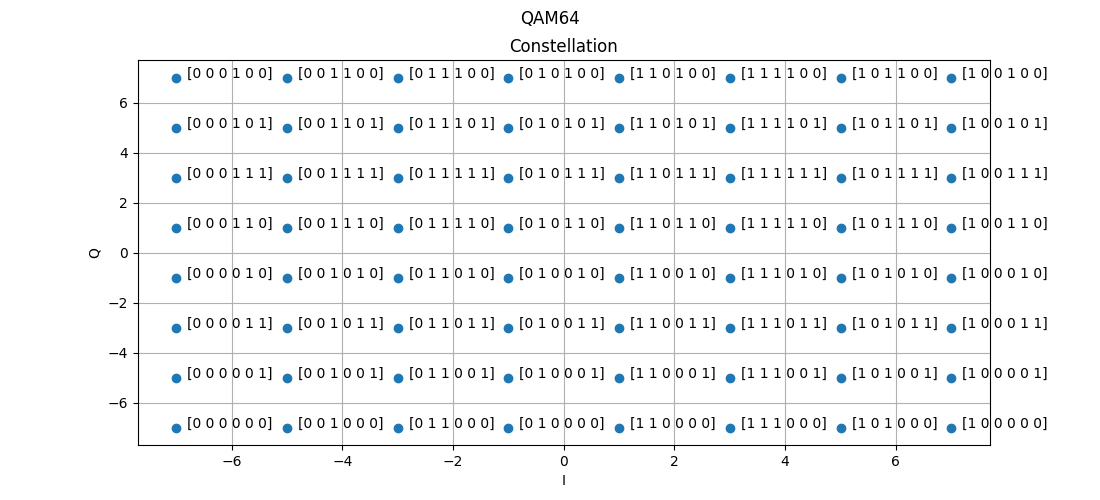

In [8]:
import commpy

for M in [4, 16, 64]:
    plt.figure(figsize=(11,5))
    plt.suptitle('QAM'+str(M))
    plt.xlabel('I')
    plt.ylabel('Q')
    qam = commpy.modulation.QAMModem(M)
    qam.plot_constellation()
